In [1]:
from evwTools import *

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./data/TestEvents_Ewest_gt_700_Eeast_lt_200_60hUnblinding.root")
#f.ls()

In [3]:
t = f.Get("evwTree")
t.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries :     4547 : Total =         1884305 bytes  File  Size =     725859 *
*        :          : Tree compression factor =   2.58                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :     4547 : Total  Size=      18753 bytes  File Size  =       5715 *
*Baskets :        1 : Basket Size=    2491904 bytes  Compression=   3.20     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :     4547 : Total  Size=      18768 bytes  File Size  =       8375 *
*Baskets :        1 : Basket Size=    2491904 bytes  Compression=   2.18     *
*...................................................

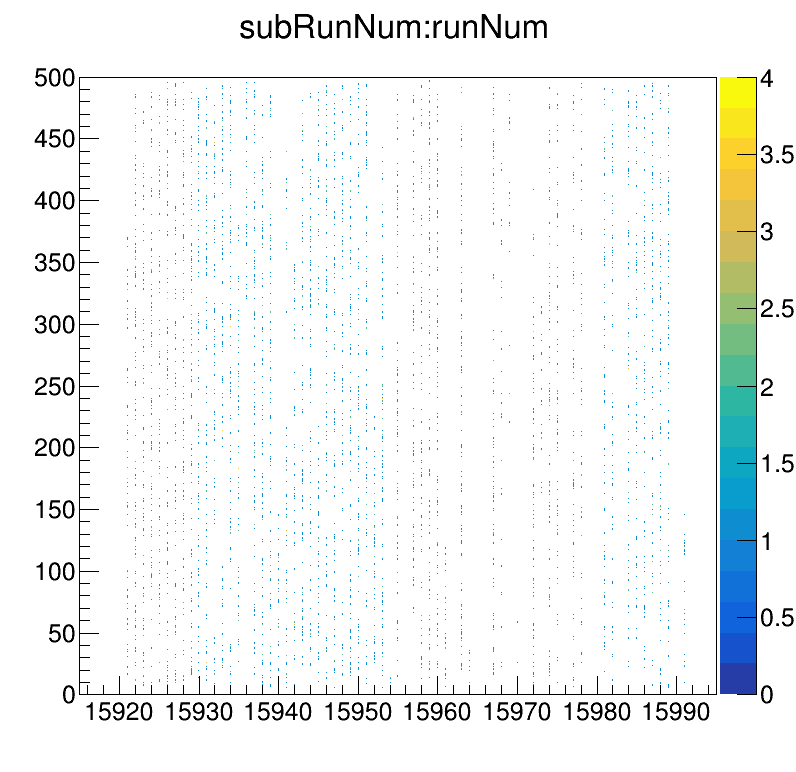

In [4]:
c = r.TCanvas("c","c",800,800)
#t.Draw("subRunNum:runNum>>hist(15995-15915,15915,15995,500,0,500)","subRunNum == 396 && runNum == 15975","colz")
#t.Draw("subRunNum:runNum>>hist(15995-15915,15915,15995,500,0,500)","subRunNum == 151 && runNum == 15963","colz")
t.Draw("subRunNum:runNum>>hist(15995-15915,15915,15995,500,0,500)","","colz")
c.Draw()

[56.0, 52.0, 94.0]


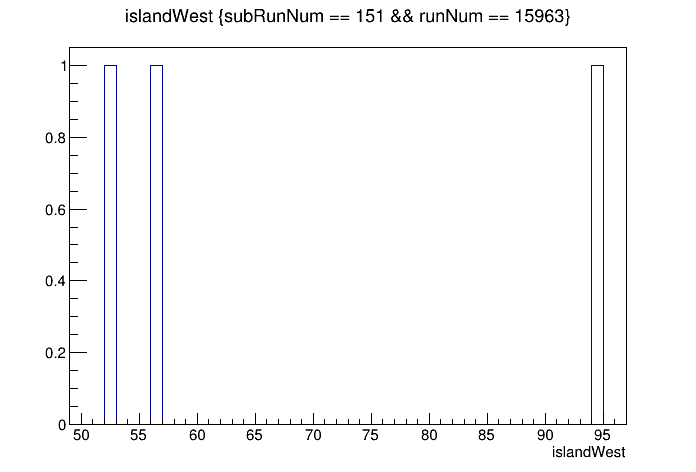

In [5]:
c = r.TCanvas()
t.Draw("islandWest","subRunNum == 151 && runNum == 15963","colz")
print([t.GetV1()[x] for x in range(3)])

c.Draw()

[26911.515364198724, 26215.182319847263, 43826.12713210651]


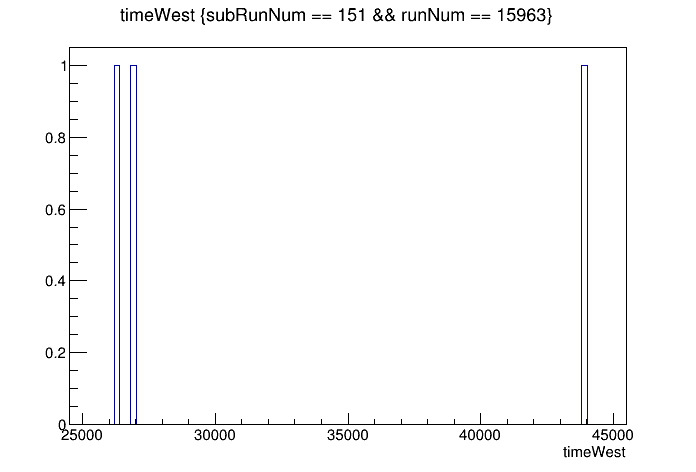

In [6]:
c = r.TCanvas()
t.Draw("timeWest","subRunNum == 151 && runNum == 15963","colz")
print([t.GetV1()[x] for x in range(3)])

c.Draw()

[14, 22, 19] [56, 52, 94] [95, 114, 142]


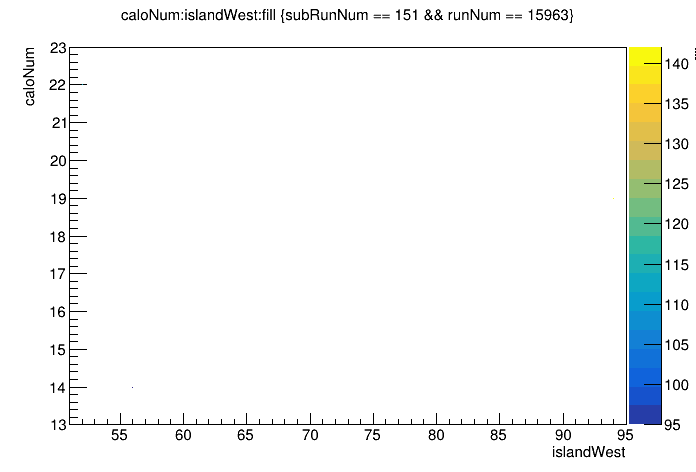

In [6]:
c = r.TCanvas()
t.Draw("caloNum:islandWest:fill","subRunNum == 151 && runNum == 15963","colz")
calos = [int(t.GetV1()[x]) for x in range(3)]
islands = [int(t.GetV2()[x]) for x in range(3)]
fills = [int(t.GetV3()[x]) for x in range(3)]

print(calos,islands,fills)

c.Draw()

In [7]:
fwave = r.TFile("./data/waveforms_15963_00151.root")
fwave.ls()
twave = fwave.Get("islands").Get("islands").Get("islandTree")

TFile**		./data/waveforms_15963_00151.root	
 TFile*		./data/waveforms_15963_00151.root	
  KEY: TDirectoryFile	islands;1	islands (CaloIslandAnalyzer) folder


1596300151000950001400056
Energy east: 29.170473079213377
Energy west: 1308.2638790117066


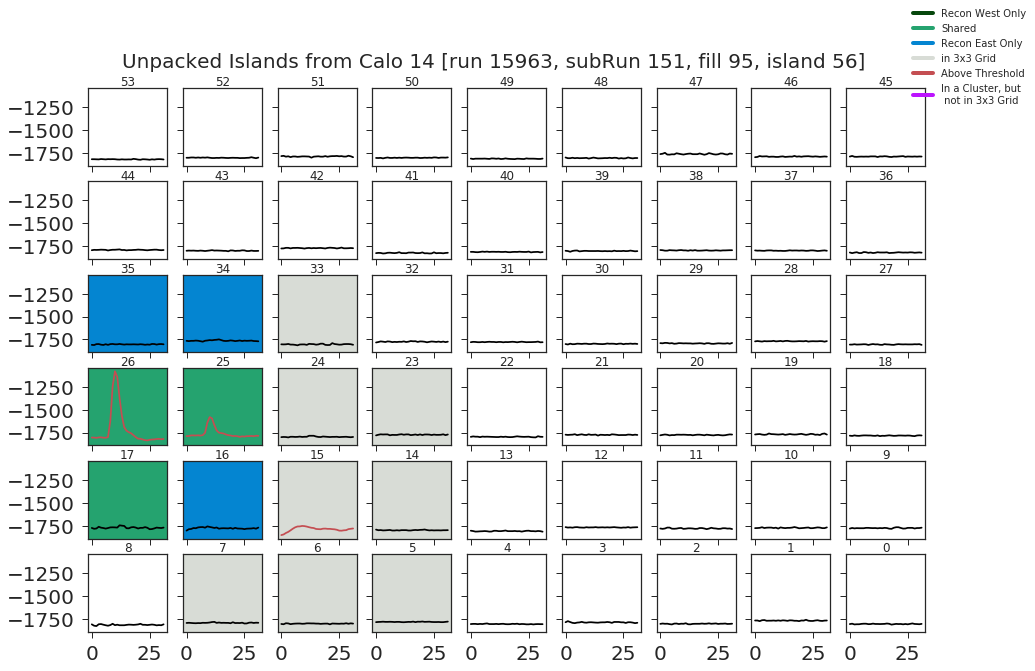

1596300151001140002200052
Energy east: 76.58838418976475
Energy west: 1286.6918575366685


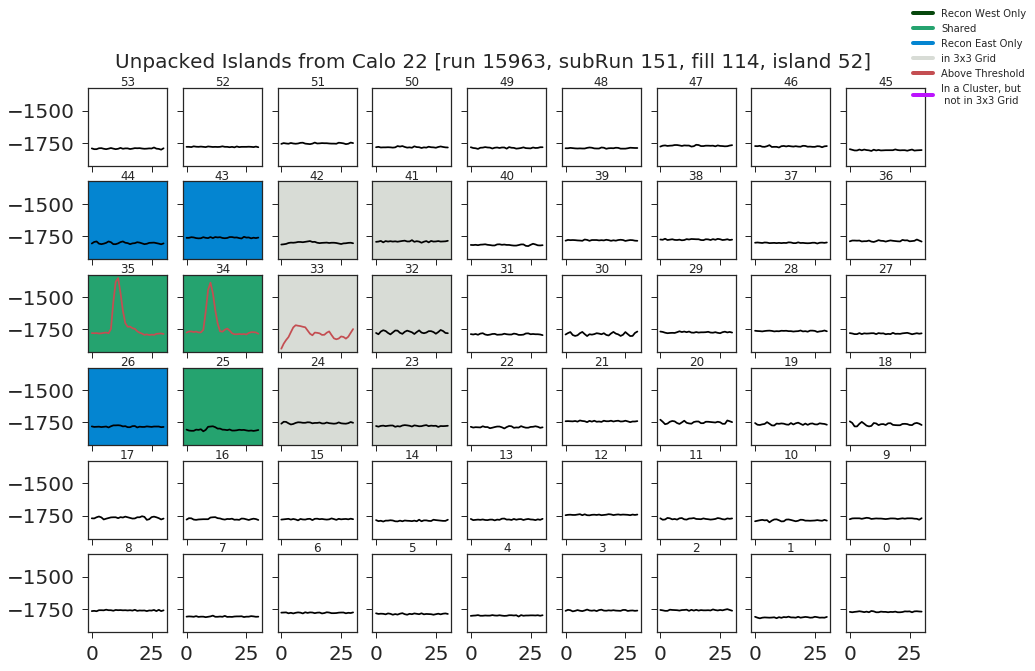

1596300151001420001900094
Energy east: 38.79762689785309
Energy west: 2492.428727337678


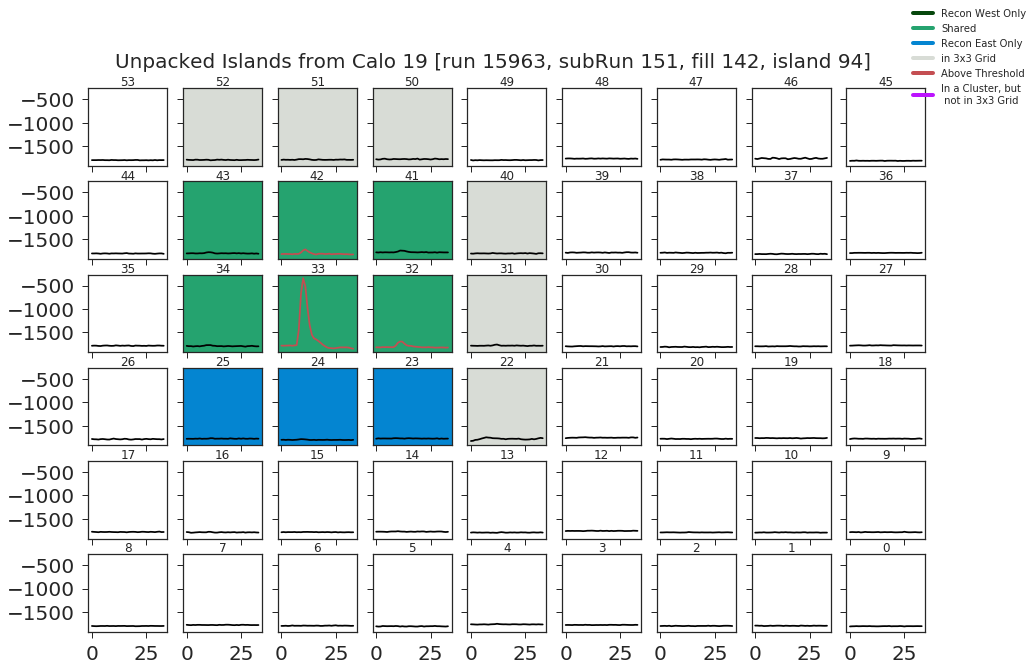

In [8]:
for x in range(len(islands)):
    uniqueID = int("1596300151"+str(fills[x]).zfill(5)+str(calos[x]).zfill(5)+str(islands[x]).zfill(5))
    print(uniqueID)
    islandPlotCompOnly(uniqueID, t, twave)

1596300151000950001400056


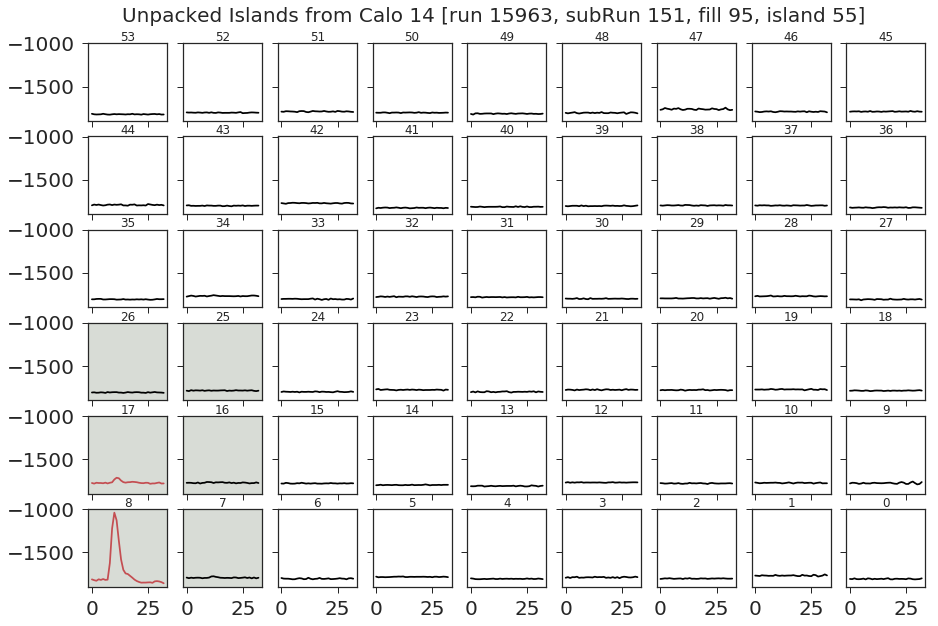

1596300151001140002200052


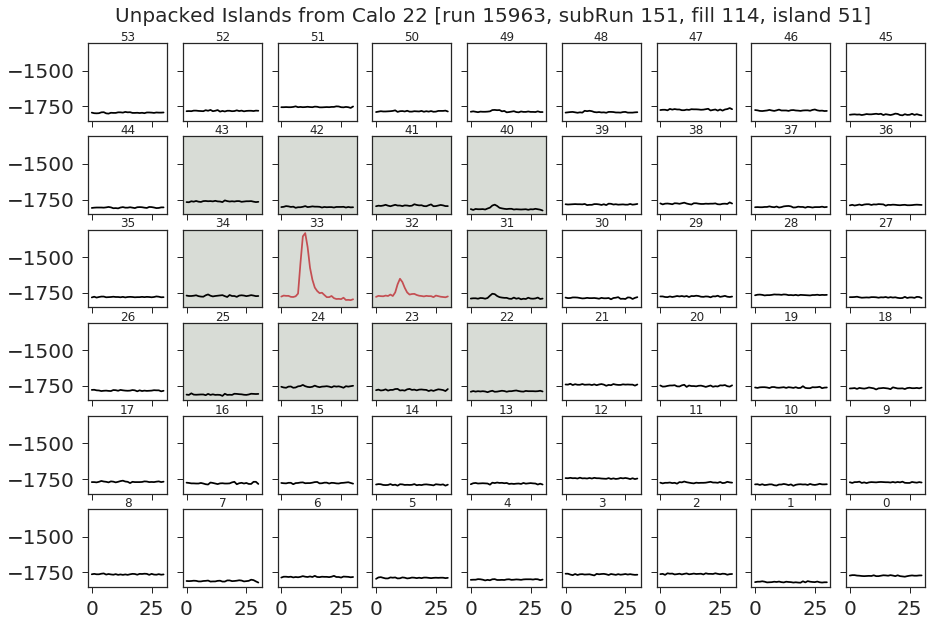

1596300151001420001900094


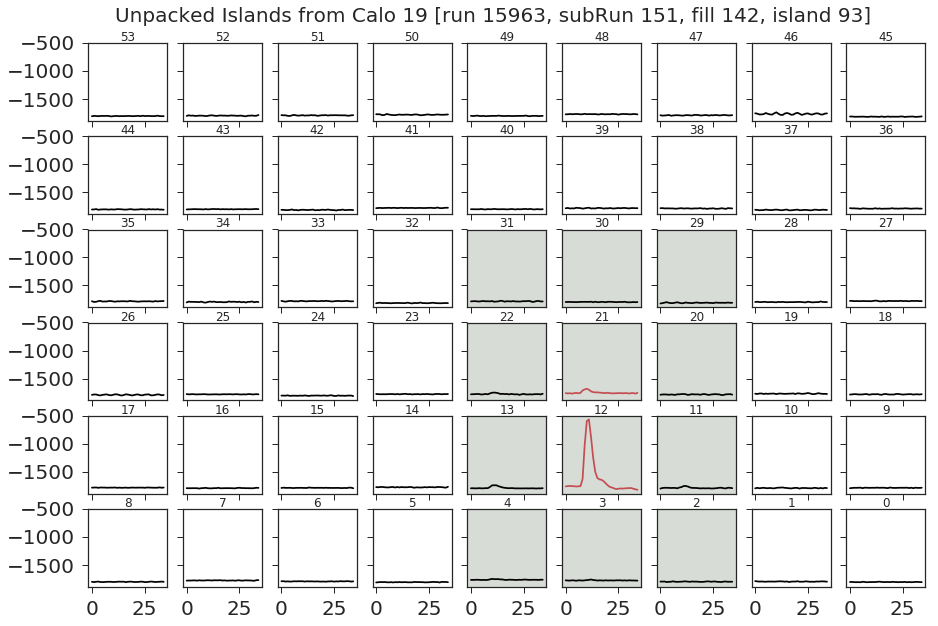

In [9]:
for x in range(len(islands)):
    uniqueID = int("1596300151"+str(fills[x]).zfill(5)+str(calos[x]).zfill(5)+str(islands[x]).zfill(5))
    print(uniqueID)
    islandPlotWaveOnly(uniqueID-1, twave)

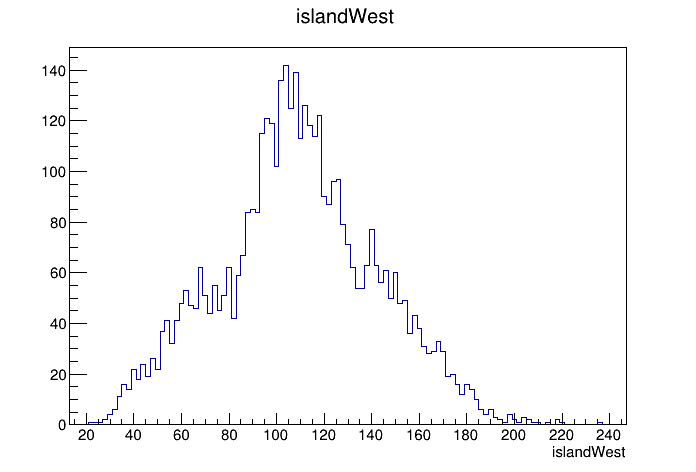

In [10]:
c = r.TCanvas()
t.Draw("islandWest")
c.Draw()

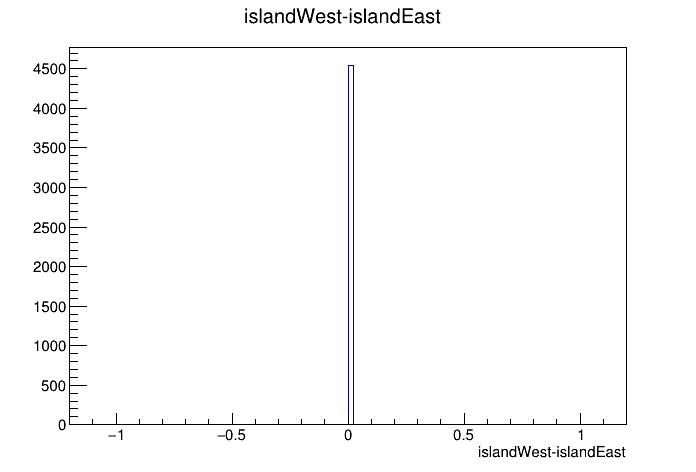

In [11]:
c = r.TCanvas()
t.Draw("islandWest-islandEast")
c.Draw()

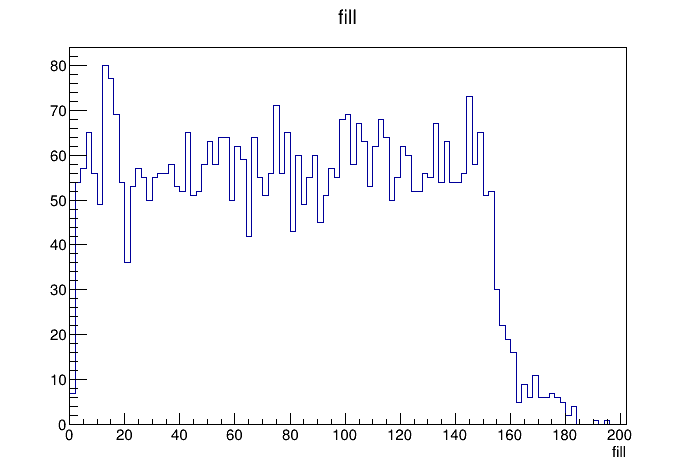

In [12]:
c = r.TCanvas()
t.Draw("fill")
c.Draw()

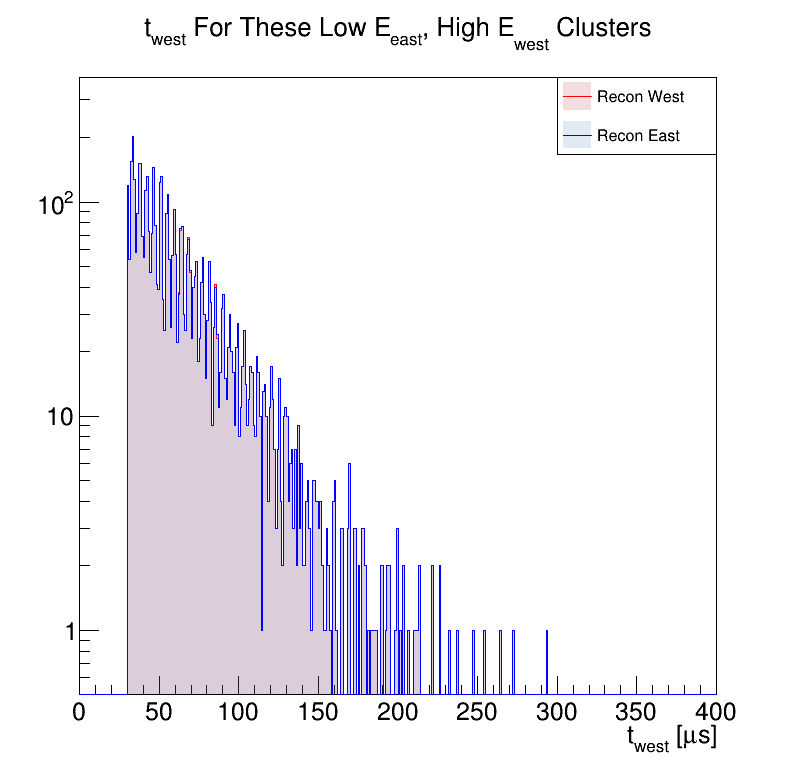

In [13]:
c = r.TCanvas("c","c",800,800)
h = r.TH1D("h","t_{west} For These Low E_{east}, High E_{west} Clusters; t_{west} [#mus]",400,0,400)
h2 = r.TH1D("h2","t_{west} For These Low E_{east}, High E_{west} Clusters; t_{west} [#mus]",400,0,400)
t.Draw("timeWest*1.25/1000.>>h","","goff")
t.Draw("timeEast*1.25/1000.>>h2","","goff")
h.SetLineColor(2)
h.SetFillColorAlpha(46,0.2)
h2.SetLineColor(4)
h2.SetFillColorAlpha(38,0.2)

h.Draw()
h2.Draw("SAME")

leg = r.TLegend(0.7,0.8,0.9,0.9)
leg.AddEntry(h,"Recon West","fl")
leg.AddEntry(h2,"Recon East","fl")
leg.Draw()

c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


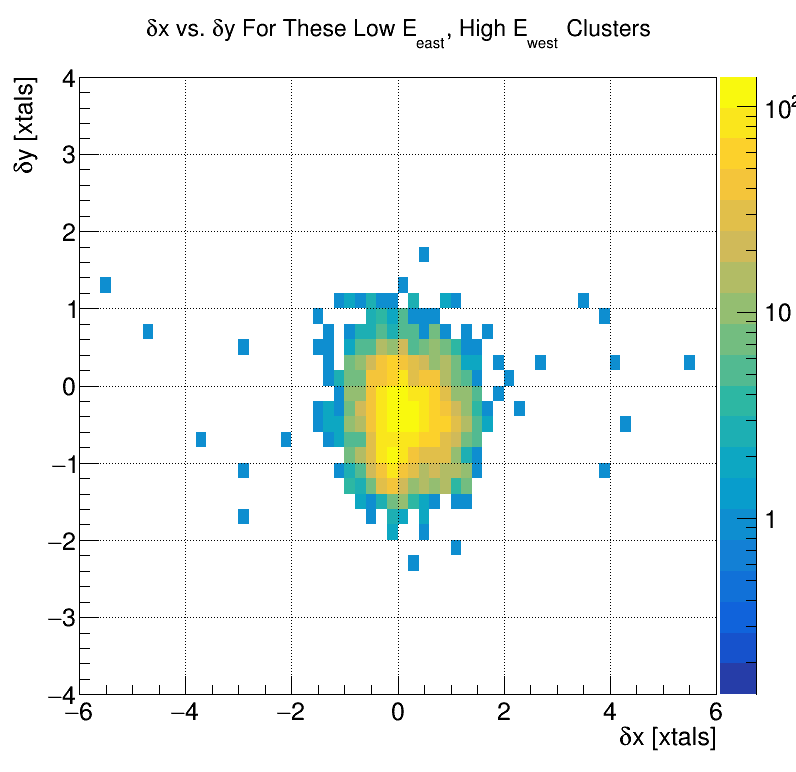

In [14]:
c = r.TCanvas("c","c",800,800)
h = r.TH2D("h","#deltax vs. #deltay For These Low E_{east}, High E_{west} Clusters; #deltax [xtals]; #deltay [xtals]",60,-6,6,40,-4,4)
t.Draw("deltaY:deltaX.>>h","","goff")
h.Draw("colz")
c.SetLogz()
c.SetGrid()
c.Draw()

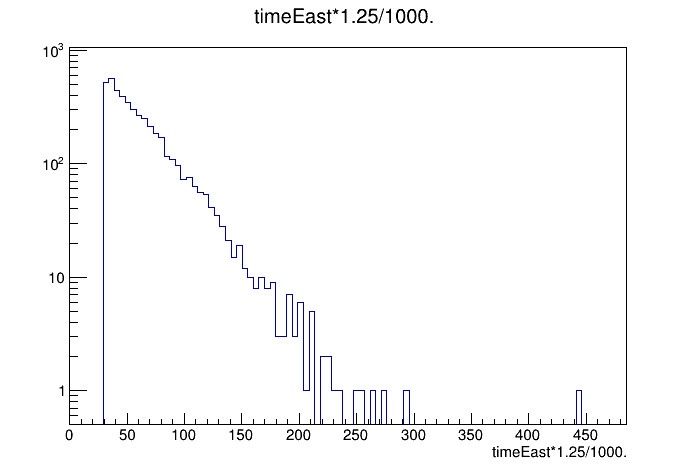

In [15]:
c = r.TCanvas()
t.Draw("timeEast*1.25/1000.")
c.SetLogy()
c.Draw()

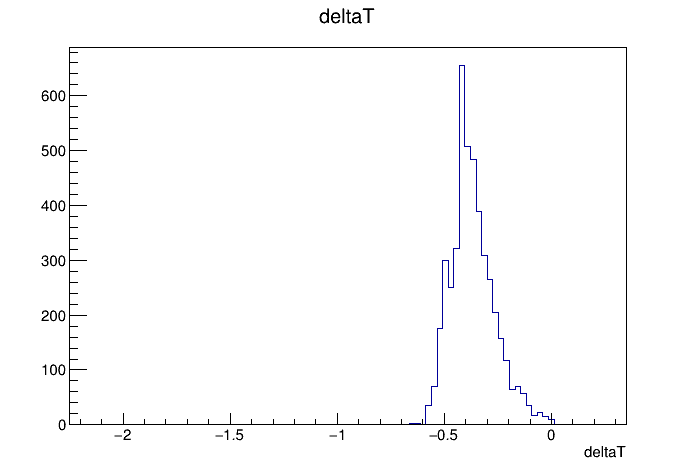

In [16]:
c = r.TCanvas()
t.Draw("deltaT")
c.Draw()

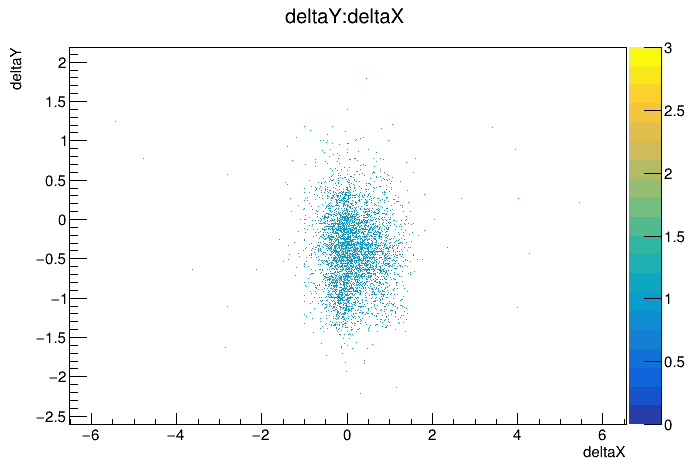

In [17]:
c = r.TCanvas()
t.Draw("deltaY:deltaX","","colz")
c.Draw()

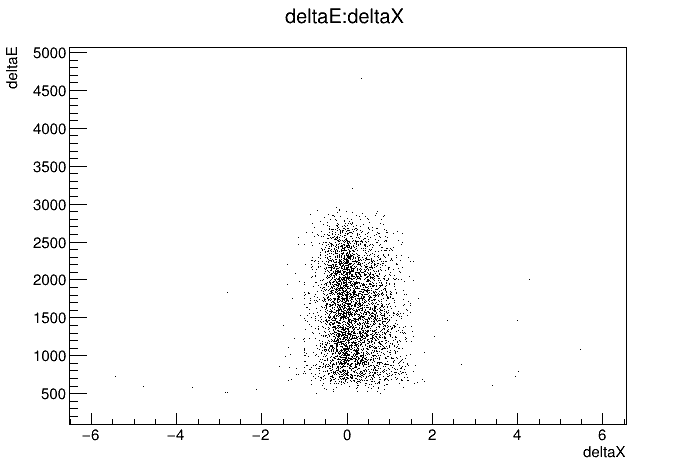

In [18]:
c = r.TCanvas()
t.Draw("deltaE:deltaX")
c.Draw()

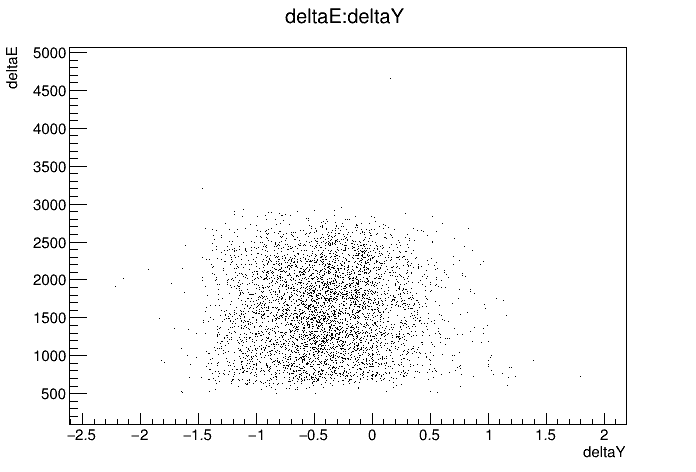

In [19]:
c = r.TCanvas()
t.Draw("deltaE:deltaY")
c.Draw()

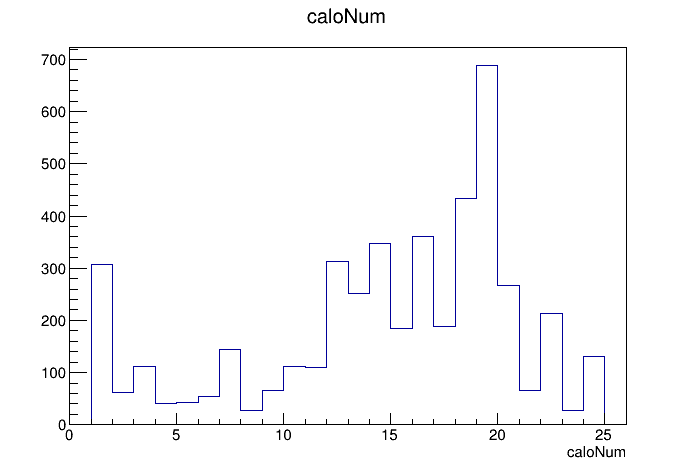

In [20]:
c = r.TCanvas()
t.Draw("caloNum")
c.Draw()

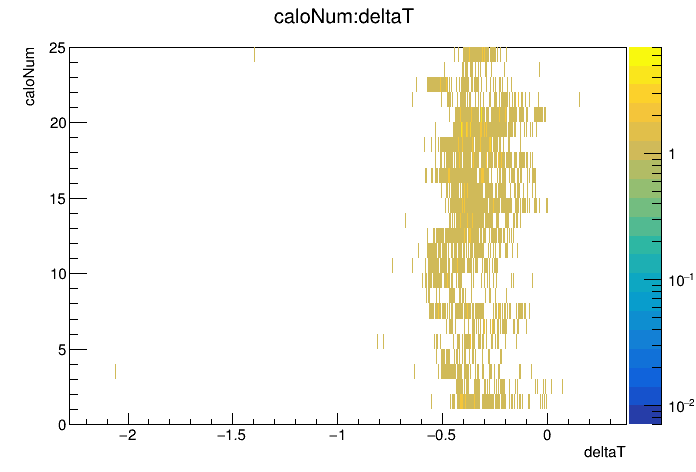

In [21]:
c = r.TCanvas()
t.Draw("caloNum:deltaT","","colz")
c.SetLogz()
c.Draw()

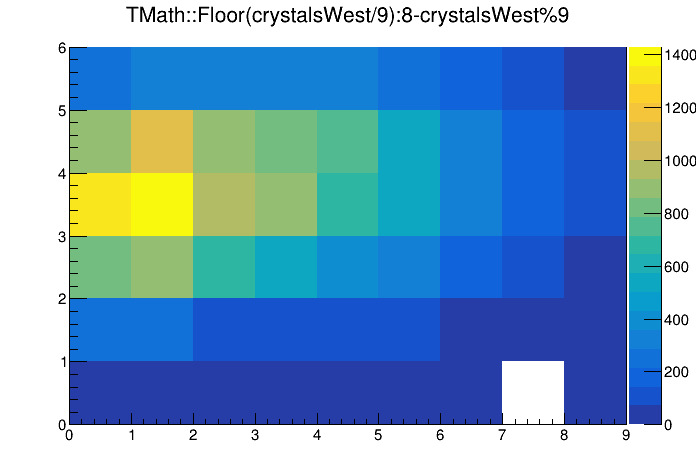

In [22]:
c = r.TCanvas()
t.Draw("TMath::Floor(crystalsWest/9):8-crystalsWest%9>>hist(9,0,9,6,0,6)","","colz")
c.Draw()

In [23]:
ding = [x for x in range(54)]

In [24]:
print(ding)
print([(8 - x % 9 , np.floor(x/8.)) for x in ding])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
[(8, 0.0), (7, 0.0), (6, 0.0), (5, 0.0), (4, 0.0), (3, 0.0), (2, 0.0), (1, 0.0), (0, 1.0), (8, 1.0), (7, 1.0), (6, 1.0), (5, 1.0), (4, 1.0), (3, 1.0), (2, 1.0), (1, 2.0), (0, 2.0), (8, 2.0), (7, 2.0), (6, 2.0), (5, 2.0), (4, 2.0), (3, 2.0), (2, 3.0), (1, 3.0), (0, 3.0), (8, 3.0), (7, 3.0), (6, 3.0), (5, 3.0), (4, 3.0), (3, 4.0), (2, 4.0), (1, 4.0), (0, 4.0), (8, 4.0), (7, 4.0), (6, 4.0), (5, 4.0), (4, 5.0), (3, 5.0), (2, 5.0), (1, 5.0), (0, 5.0), (8, 5.0), (7, 5.0), (6, 5.0), (5, 6.0), (4, 6.0), (3, 6.0), (2, 6.0), (1, 6.0), (0, 6.0)]


In [25]:
xtalVec = []
for i in range(1,25):
    h = r.TH2D("h","Crystals in recon west in calo"+str(i)+"; x [xtals]; y [xtals]",9,0,9,6,0,6)
    t.Draw("TMath::Floor(crystalsWest/9):8-crystalsWest%9>>h","caloNum=="+str(i),"goff")
    xtalVec.append(h.Clone(str(i)))


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 

In [26]:
print(xtalVec)

[<ROOT.TH2D object ("1") at 0x7fb5149d5ac0>, <ROOT.TH2D object ("2") at 0x7fb546687ff0>, <ROOT.TH2D object ("3") at 0x7fffe19e7bb0>, <ROOT.TH2D object ("4") at 0x7fb554762500>, <ROOT.TH2D object ("5") at 0x7fb55338af00>, <ROOT.TH2D object ("6") at 0x7fb5146e8fd0>, <ROOT.TH2D object ("7") at 0x7fb552cea690>, <ROOT.TH2D object ("8") at 0x7fb5128c3a00>, <ROOT.TH2D object ("9") at 0x7fb554ab48c0>, <ROOT.TH2D object ("10") at 0x7fb542ae9600>, <ROOT.TH2D object ("11") at 0x7fb5420fa1f0>, <ROOT.TH2D object ("12") at 0x7fb52c70af50>, <ROOT.TH2D object ("13") at 0x7fb5557e4100>, <ROOT.TH2D object ("14") at 0x7fb55ba09400>, <ROOT.TH2D object ("15") at 0x7fb510549cb0>, <ROOT.TH2D object ("16") at 0x7fb545fd4770>, <ROOT.TH2D object ("17") at 0x7fb555b4ba00>, <ROOT.TH2D object ("18") at 0x7fb51cac15b0>, <ROOT.TH2D object ("19") at 0x7fb510d75bd0>, <ROOT.TH2D object ("20") at 0x7fffe1921e00>, <ROOT.TH2D object ("21") at 0x7fb55a61f390>, <ROOT.TH2D object ("22") at 0x7fffe19e8a90>, <ROOT.TH2D object 

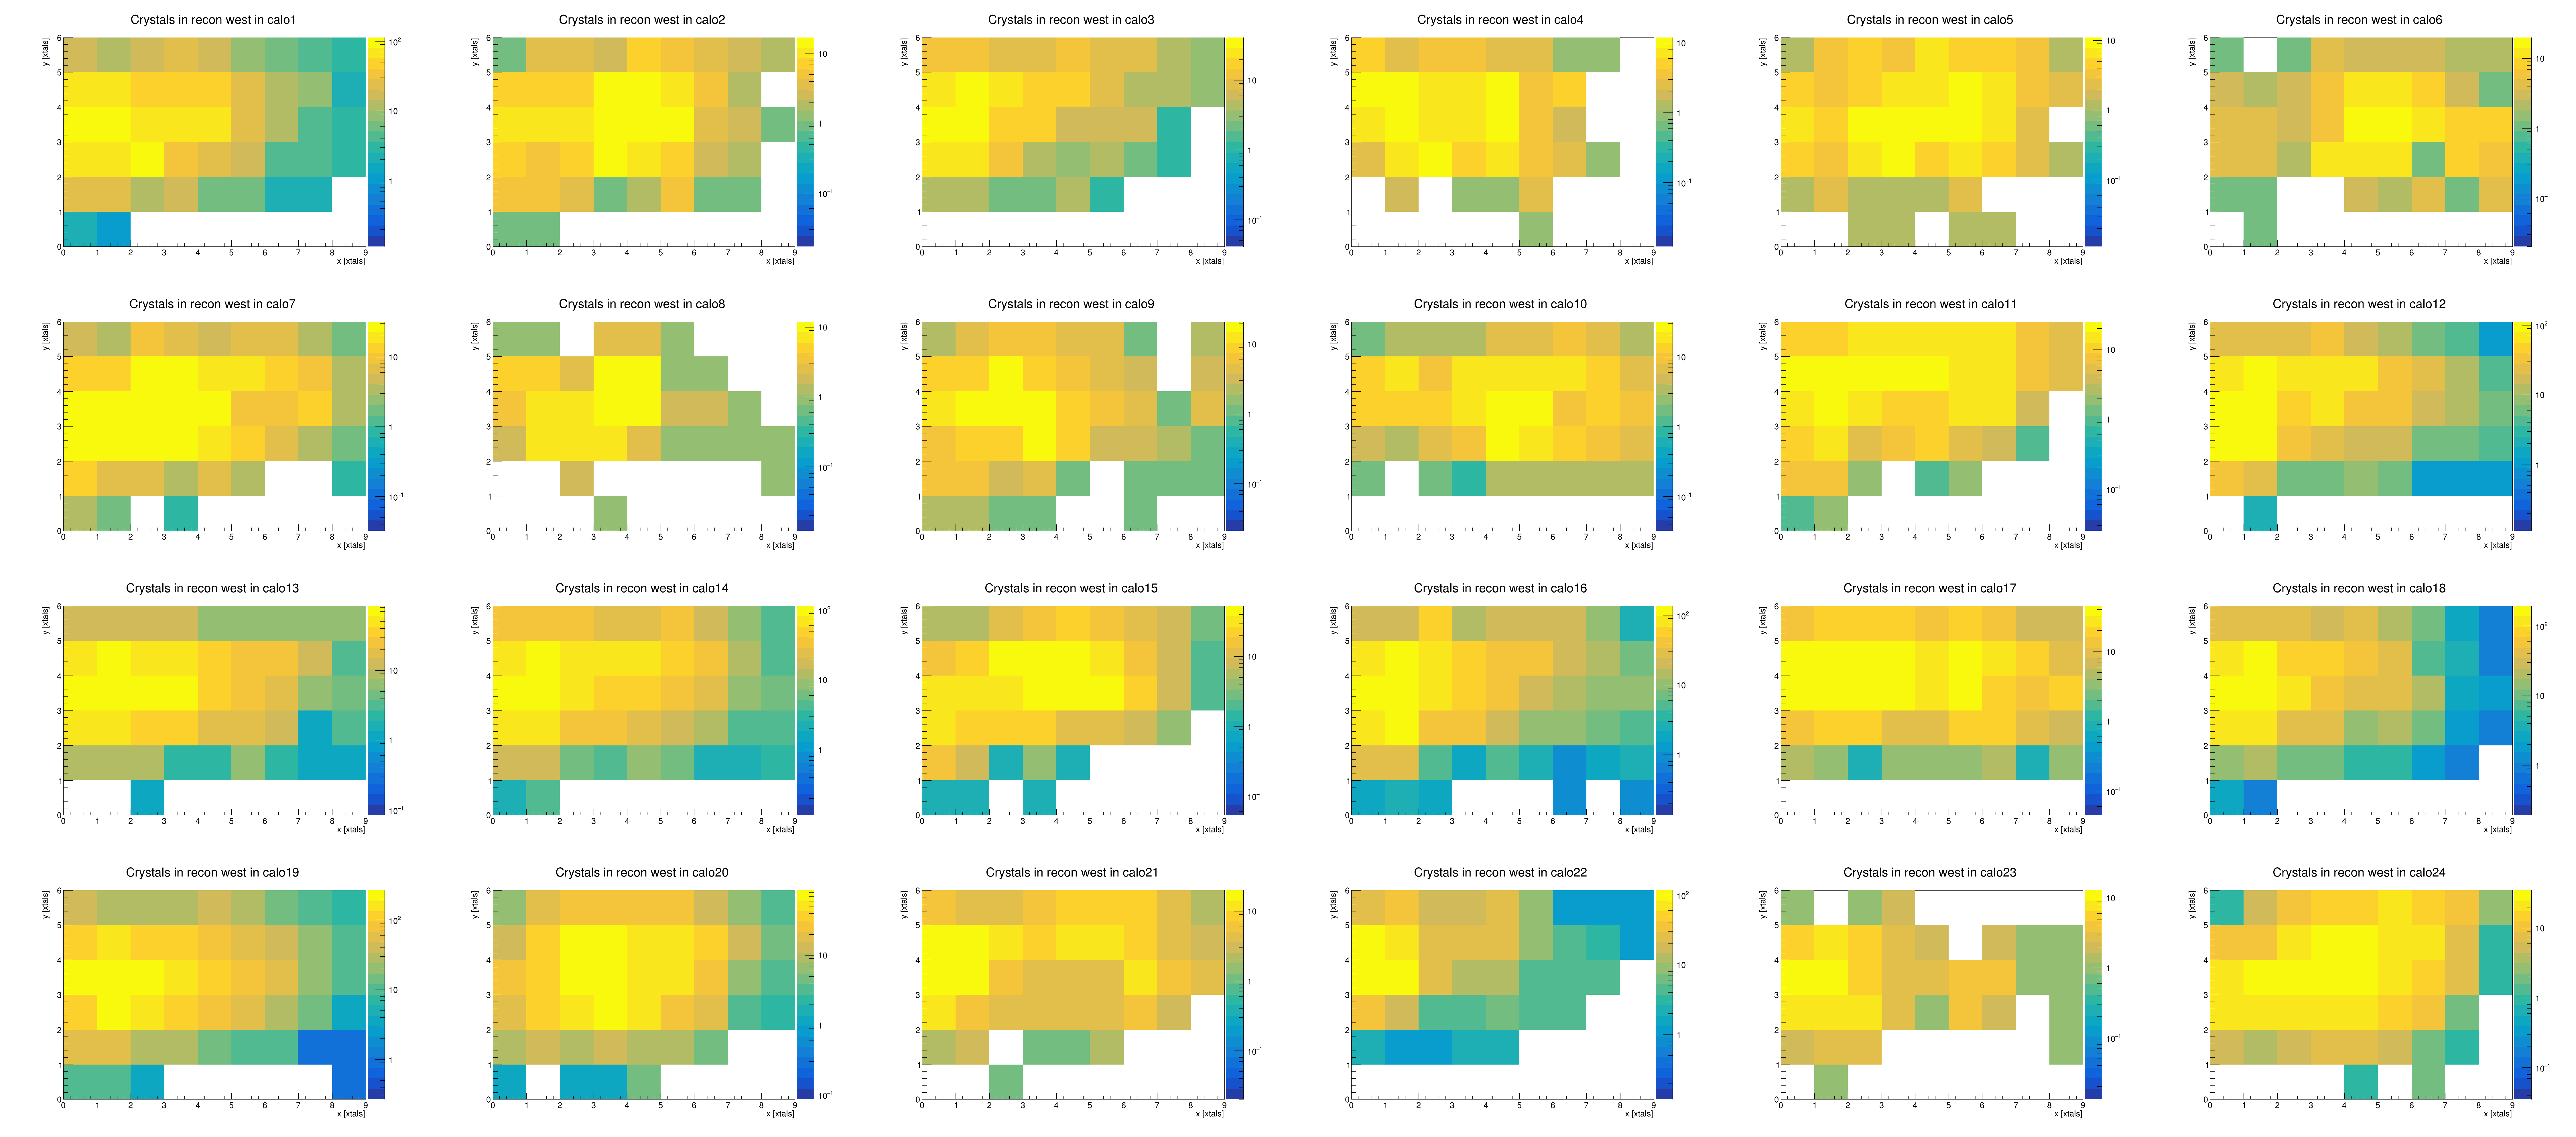

In [27]:
c5 = r.TCanvas("c5","c5",9000,4000)
c5.Divide(6,4)

for i, hist in enumerate(xtalVec):
    c5.cd(i+1)
    #r.gPad.SetLogz()
    #hist.GetZaxis().SetRangeUser(0.01,1)
    r.gPad.SetLogz()
    hist.Draw("colz")

c5.Draw()
#c5.Print("./c5.root")

In [28]:
xtalVecE = []
for i in range(1,25):
    h = r.TH2D("h","Crystals in recon east in calo"+str(i)+"; x [xtals]; y [xtals]",9,0,9,6,0,6)
    t.Draw("TMath::Floor(crystalsEast/9):8-crystalsEast%9>>h","caloNum=="+str(i),"goff")
    xtalVecE.append(h.Clone(str(i)))


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


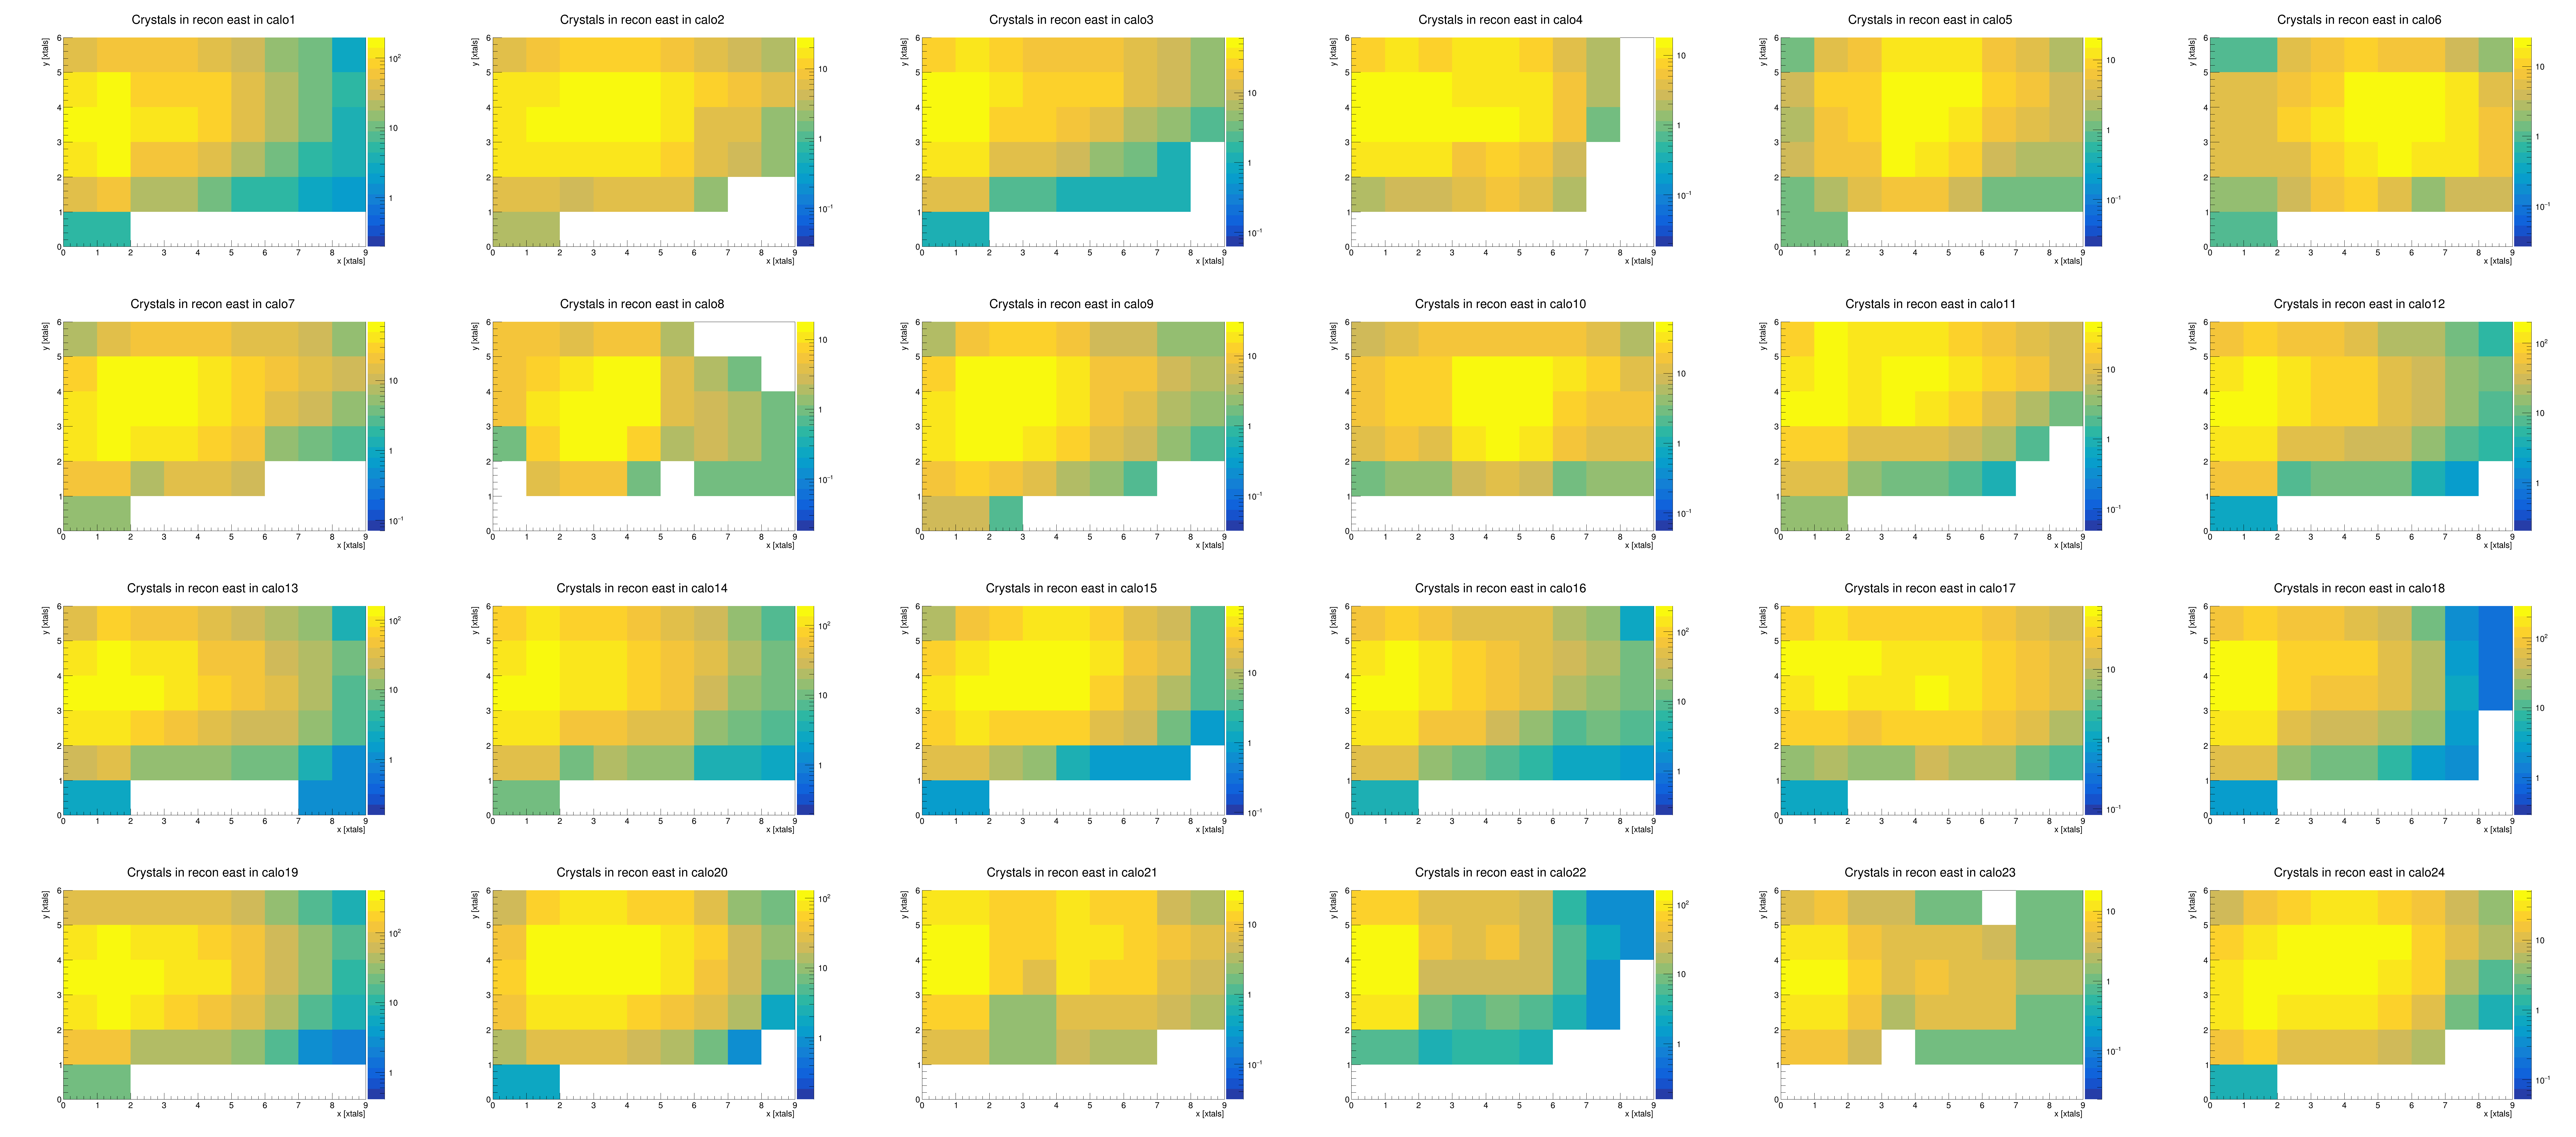

In [29]:
c5 = r.TCanvas("c5","c5",9000,4000)
c5.Divide(6,4)

for i, hist in enumerate(xtalVecE):
    c5.cd(i+1)
    #r.gPad.SetLogz()
    #hist.GetZaxis().SetRangeUser(0.01,1)
    r.gPad.SetLogz()
    hist.Draw("colz")

c5.Draw()
#c5.Print("./c5.root")

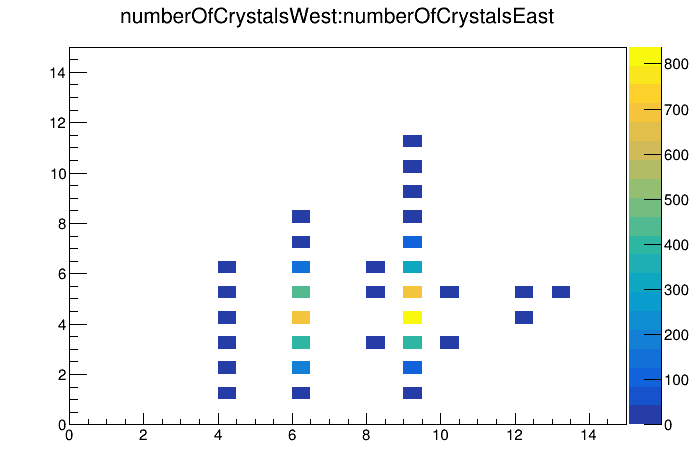

In [30]:
c = r.TCanvas()
t.Draw("numberOfCrystalsWest:numberOfCrystalsEast>>hist(30,0,15,30,0,15)","","colz")
c.Draw()

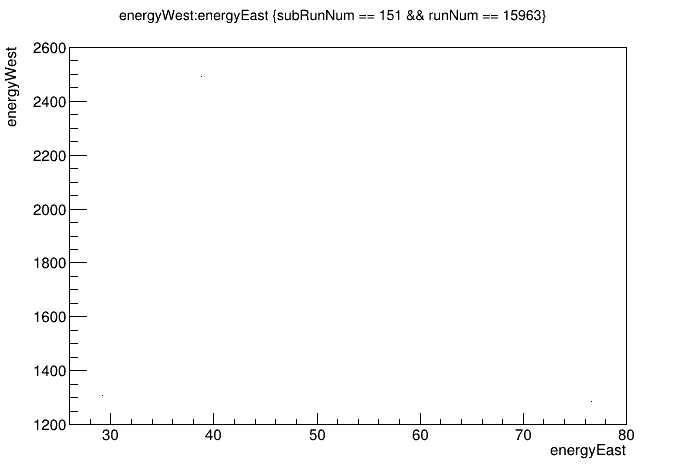

In [31]:
c = r.TCanvas()
t.Draw("energyWest:energyEast","subRunNum == 151 && runNum == 15963")
c.Draw()